# Exercise 1
Our 2 quantities $p(x|\omega_1)p(\omega_1)$ and $p(x|\omega_2)p(\omega_2)$ could be depicted as follows:

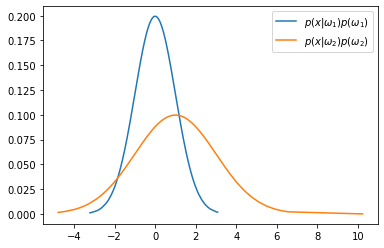

In [72]:
import seaborn as sns
from scipy.stats import norm
from matplotlib import pyplot as plt
p_omega_1 = p_omega_2 = 1/2
p_x_given_omega_1 = norm(0,1)
p_x_given_omega_2 = norm(1,2)
x1 = p_x_given_omega_1.rvs(1000)
x2 = p_x_given_omega_2.rvs(1000)

sns.lineplot(x1,p_x_given_omega_1.pdf(x1) * p_omega_1, label='$p(x|\omega_1)p(\omega_1)$')
sns.lineplot(x2,p_x_given_omega_2.pdf(x2) * p_omega_2, label='$p(x|\omega_2)p(\omega_2)$')
plt.show()

In order to find the class regions of the 2 classes we need to solve:
$$p(x|\omega_1)p(\omega_1) = p(x|\omega_2)p(\omega_2)$$
Since the apriori probabilities of the two classes are equioprobable we only need to solve:
$$
\begin{align*}
&p(x|\omega_1) = p(x|\omega_2) \\
\Rightarrow &\frac{1}{\sqrt{2\pi\sigma_1^2}}exp\bigg( -\frac{(x-\mu_1)^2}{2\sigma_1^2} \bigg)
= \frac{1}{\sqrt{2\pi\sigma_2^2}}exp\bigg( -\frac{(x-\mu_2)^2}{2\sigma_2^2} \bigg) \\
\Rightarrow &\frac{1}{\sigma_1}exp\bigg( -\frac{(x-\mu_1)^2}{2\sigma_1^2} \bigg)
= \frac{1}{\sigma_2}exp\bigg( -\frac{(x-\mu_2)^2}{2\sigma_2^2} \bigg) \\
\Rightarrow & \sigma_2 exp\bigg( -\frac{(x-\mu_1)^2}{2\sigma_1^2} \bigg)
= \sigma_1 exp\bigg( -\frac{(x-\mu_2)^2}{2\sigma_2^2} \bigg) \\
\Rightarrow & \ln\sigma_2  -\frac{(x-\mu_1)^2}{2\sigma_1^2} 
= \ln\sigma_1 -\frac{(x-\mu_2)^2}{2\sigma_2^2} \\
\Rightarrow & \ln2  -\frac{x^2}{2} +  \frac{(x-1)^2}{8} = 0\\
\Rightarrow & 8\ln2  -3x^2 - 2x + 1 = 0\\
\Rightarrow &  3x^2 + 2x - 1 - 8\ln2 = 0\\
\Rightarrow &  3x^2 + 2x -6.545 = 0\\
\end{align*}
$$

solving the 2nd degree polynomial we have 
* $x_1 = 1.18$
* $x_2 = -1.84$

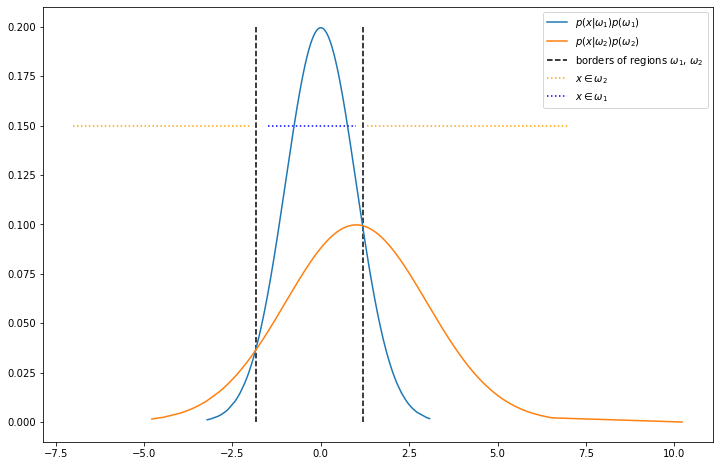

In [73]:
axs, fig = plt.subplots(figsize=(12,8))
sns.lineplot(x1,p_x_given_omega_1.pdf(x1) * p_omega_1, label='$p(x|\omega_1)p(\omega_1)$')
sns.lineplot(x2,p_x_given_omega_2.pdf(x2) * p_omega_2, label='$p(x|\omega_2)p(\omega_2)$')
plt.vlines(1.18, 0, 0.2, linestyles='--', label = 'borders of regions $\omega_1$, $\omega_2$')
plt.vlines(-1.84, 0, 0.2, linestyles='--')
plt.hlines(0.15, -7, -2, color='orange', label='$x \in \omega_2$', linestyles='dotted')
plt.hlines(0.15, -1.5, 1, color='blue', label='$x \in \omega_1$' ,linestyles='dotted')
plt.hlines(0.15, 1.3, 7, color='orange', linestyles='dotted')
plt.legend()
plt.show()

Class Region $\omega_1: R_D [x: -1.84<x<1.18]$ \
Class Region $\omega_2: R_D [x: -\infty<x<-1.84] \cup [x: 1.18<x<\infty]$

# Exercise 2
## a)
Since the two classes are equiprobable we have that $p(\omega_1) = p(\omega_2) = \frac{1}{2}$
We also have the distributions of the two classes $p(x|\omega_1) \sim N(\mu_1, \Sigma)$ and $p(x|\omega_2) \sim N(\mu_2, \Sigma)$ \

In order to find the border of the classifier we need to solve
$$
\begin{align*}
&p(x|\omega_1) = p(x|\omega_2) \\
\Rightarrow& \frac{1}{2\pi|\Sigma|^{1/2}} exp\big(-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)\big) = 
    \frac{1}{2\pi|\Sigma|^{1/2}} exp\big(-\frac{1}{2}(x-\mu_2)^T\Sigma^{-1}(x-\mu_2)\big) \\
\Rightarrow& (x-\mu_1)^T\Sigma^{-1}(x-\mu_1) = (x-\mu_2)^T\Sigma^{-1}(x-\mu_2)
\end{align*}
$$

Since $\Sigma = \sigma^2 I$

$$
\begin{align*}
&(x-\mu_1)^T(x-\mu_1) = (x-\mu_2)^T(x-\mu_2) \\
\Rightarrow& ||x-\mu_1||^2 = ||x-\mu_2||^2
\end{align*}
$$

which is the equation of the perpendicular bisector

## b)
In the case where $\Sigma \ne \sigma^2 I$ we would have
$$
\begin{align*}
&(x-\mu_1)^T\Sigma^{-1}(x-\mu_1) = (x-\mu_2)^T\Sigma^{-1}(x-\mu_2) \\
\Rightarrow& x^T\Sigma^{-1}x - x^T\Sigma^{-1}\mu_1 - \mu_1^T\Sigma^{-1}x + \mu_1^T\Sigma^{-1}\mu_1
 = x^T\Sigma^{-1}x - x^T\Sigma^{-1}\mu_2 - \mu_2^T\Sigma^{-1}x + \mu_2^T\Sigma^{-1}\mu_2 \\
\Rightarrow& 2\mu_1^T\Sigma^{-1}x - \mu_1^T\Sigma^{-1}\mu_1 = 2\mu_2^T\Sigma^{-1}x - \mu_2^T\Sigma^{-1}\mu_2 \\
\Rightarrow& 2\mu_1^T\Sigma^{-1}x - 2\mu_2^T\Sigma^{-1}x  - \mu_1^T\Sigma^{-1}\mu_1 + \mu_2^T\Sigma^{-1}\mu_2 = 0 \\
\Rightarrow& (2\mu_1^T\Sigma^{-1}- 2\mu_2^T\Sigma^{-1})x  - \mu_1^T\Sigma^{-1}\mu_1 + \mu_2^T\Sigma^{-1}\mu_2 = 0 
\end{align*}
$$



setting $b_1 = 2\mu_1^T\Sigma^{-1}- 2\mu_2^T\Sigma^{-1}$ and $b_0=- \mu_1^T\Sigma^{-1}\mu_1 + \mu_2^T\Sigma^{-1}\mu_2$
we can express the above equation in a linear fashion
$$b_1x + b_0 = 0$$

The line is not the perpendicular to the distance between $\mu_1$ and $\mu_2$ but has orientation imposed by the covariance matrix $\Sigma$.

# Exrcise 3
## i) Equiproble Classes

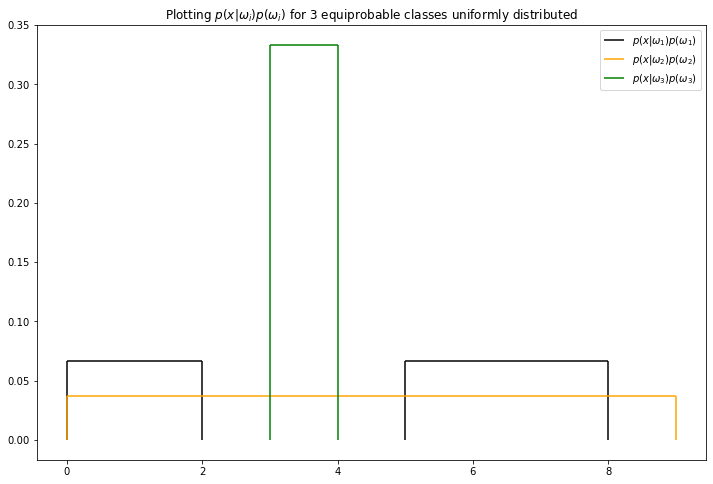

In [74]:
#i)
fig, axs = plt.subplots(figsize=(12,8))

#plot class omega_1
axs.hlines(1/5 * 1/3,0,2, label = '$p(x|\omega_1)p(\omega_1)$', color='black')
axs.vlines(0,0,1/5 * 1/3, color='black')
axs.vlines(2,0,1/5 * 1/3, color='black')
axs.hlines(1/5 * 1/3,5,8)
axs.vlines(5,0,1/5 * 1/3, color='black')
axs.vlines(8,0,1/5 * 1/3, color='black')

#plot class omega_2
axs.hlines(1/9 * 1/3,0,9, label = '$p(x|\omega_2)p(\omega_2)$', color='orange')
axs.vlines(0,0,1/9 * 1/3, color='orange')
axs.vlines(9,0,1/9 * 1/3, color='orange')

#plot class omega_3
axs.hlines(1 * 1/3,3,4, label = '$p(x|\omega_3)p(\omega_3)$', color='green')
axs.vlines(3,0,1 * 1/3, color='green')
axs.vlines(4,0,1 * 1/3, color='green')
plt.legend()
plt.title('Plotting $p(x|\omega_i)p(\omega_i)$ for 3 equiprobable classes uniformly distributed')
plt.show()

The decision regions are:
* $R_{\omega_1}(0<x<2 \cup 5<x<8)$
* $R_{\omega_2}(2<x<3 \cup 4<x<5 \cup 8<x<9)$
* $R_{\omega_3}(3<x<4)$

## ii)
$$
\begin{align*}
P_e &= p(x\in R_1, \omega_2) + p(x\in R_3, \omega_2) \\
&= \int_{0}^{2}p(x|\omega_2)p(\omega_2)dx +  \int_{5}^{8}p(x|\omega_2)p(\omega_2)dx + \int_{3}^{4}p(x|\omega_2)p(\omega_2)dx\\
&= \int_{0}^{2}\frac{1}{9}\frac{1}{3}dx +  \int_{5}^{8}\frac{1}{9}\frac{1}{3}dx + \int_{3}^{4}\frac{1}{9}\frac{1}{3}dx\\
&= \frac{2}{27} + \frac{3}{27} + \frac{1}{27} = \frac{6}{27}
\end{align*}
$$

## iii)
if x = 3.5 then it belongs to the Region of class 3 and it will be classified accordingly to class 3

## ii)i) non equiprobable classes
First of all we do not have to change the apriori probabilities of $\omega_1$ since $p(x|\omega_1) = 0$ for $x\in 2<x<5$. 
Then we need to solve:

$$
\begin{align*}
p(\omega_2|x)p(\omega_2) &> p(\omega_3|x)p(\omega_3) \\
\Rightarrow \frac{1}{9}p(\omega_2) &> p(\omega_3) \\
\Rightarrow \frac{p(\omega_2)}{p(\omega_3)} &> 9 \\
\Rightarrow \frac{p(\omega_2)}{p(\omega_3)} &> 9 \\
\end{align*}
$$
This means that $p(\omega_2)$ must be greater than 9 times $p(\omega_3)$ so that the datapoint x=3.5 would be classified under $\omega_2$.

## ii)i) non equiprobable classes
The point x=3.5 cannot be assigned to the class $\omega_1$ since $p(x|\omega_1) = 0$ for $x\in 2<x<5$.

# Exercise 4
## Parametric Approach

In [80]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

training_set = sio.loadmat('Training_set.mat')
train_x = training_set['train_x']
train_y= training_set['train_y']

test_set = sio.loadmat('Test_set.mat')
test_x = test_set['test_x']
test_y = test_set['test_y']

train_y = train_y.reshape(-1)
test_y = test_y.reshape(-1)

In [91]:
np.where(train_y[:,0]==1)

(2000, 4)

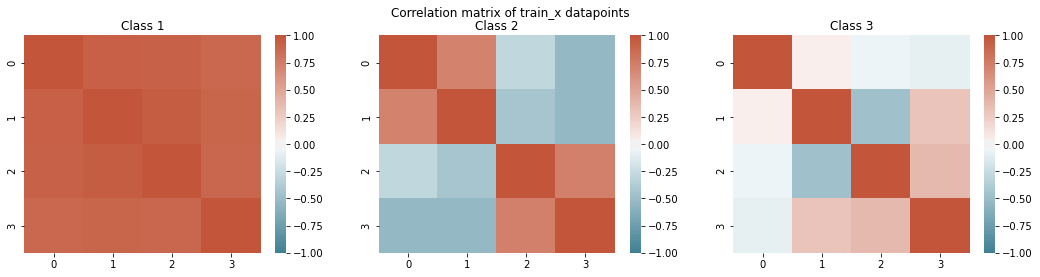

In [48]:
fig, axs = plt.subplots(1,3, figsize=(18,4))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(np.corrcoef(train_x[train_y==1].T), vmin=-1, vmax=1, ax=axs[0], cmap=cmap)
axs[0].title.set_text('Class 1')
sns.heatmap(np.corrcoef(train_x[train_y==2].T), vmin=-1, vmax=1, ax=axs[1], cmap=cmap)
axs[1].title.set_text('Class 2')
sns.heatmap(np.corrcoef(train_x[train_y==3].T), vmin=-1, vmax=1, ax=axs[2], cmap=cmap)
axs[2].title.set_text('Class 3')

plt.suptitle('Correlation matrix of train_x datapoints')
plt.show()

Observations

* For the first class we can observe high correlation between its features. We cannot assume a diagonal covariance matrix which would be ideal for a Naive Bayes Classifier
* The rest of the 2 classes also contain strong correlations between their features.

For that reason we will proceed with Quadratic Discrimination Classifier.
Assuming normal distributions, we can calculate the MLE estimates for the mean and the variance as follows:

$$
\mu_{ML} = \frac{1}{N}\sum_{i=1}^{N}x_i \\
\Sigma_{ML} = \frac{1}{N}\sum_{i=1}^{N}(x_i - \mu)^T (x_i - \mu)
$$


In [49]:
#define a function that will retrieve the means and the covariance matrix for each class
def class_statistics(class_, X, y):
    X = X[np.where(y==class_)]
    means = np.mean(X, axis=0)
    cov = np.cov(X.T)
    return means, cov

In [50]:
#retrieve the mle estimates of each class
means1, cov1 = class_statistics(1, train_x, train_y)
means2, cov2 = class_statistics(2, train_x, train_y)
means3, cov3 = class_statistics(3, train_x, train_y)

#claculate the a priori probabilities
p_omega1 = np.bincount(train_y)[1]
p_omega2 = np.bincount(train_y)[2]
p_omega3 = np.bincount(train_y)[3]

After we have "fitted" our model by calculating the sample mean and sample variance of each class, we can proceed with the predictions. For each point in test_x we will calculate the following quantity for each class
$$p(x|\omega_j)p(\omega_j)$$
Then we will assign to the class with the greatest quantity.

In [54]:
from scipy.stats import multivariate_normal
def predict(x):
    #define our three pdfs
    p_x_given_omega1 = lambda x: multivariate_normal(means1, cov1).pdf(x)
    p_x_given_omega2 = lambda x: multivariate_normal(means2, cov2).pdf(x)
    p_x_given_omega3 = lambda x: multivariate_normal(means3, cov3).pdf(x)
    
    #calculate the posteriors (without the denominator)
    posteriors = np.column_stack([
        p_x_given_omega1(x) * p_omega1
        ,p_x_given_omega2(x) * p_omega2
        ,p_x_given_omega3(x) * p_omega3
    ])
    
    #get the class with the highest posterior
    res = posteriors.argmax(axis=1) + 1
    return res

In [55]:
#predict the datapoints in test_x dataset
Btest_y = predict(test_x)
Btest_y

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

Then we will calculate the confusion matrix, the precision and the recall

In [57]:
def confusion_matrix(actual, predicted):
    #manually construct the confusion matrix
    confusion_matrix = pd.crosstab(test_y, Btest_y)
    confusion_matrix.index.rename('actuals', inplace=True)
    confusion_matrix.columns.rename('predicted', inplace=True)
    return confusion_matrix

print('Confusion Matrix of the Parametric Approach')
confusion_matrix(test_y, Btest_y)

Confusion Matrix of the Parametric Approach


predicted,1,2,3
actuals,,,
1,2000,0,0
2,0,986,14
3,1,34,965


In [58]:
def precision(actual, predicted):
    #create a dataframe for easier manipulation
    df = pd.DataFrame({'predicted':predicted, 'actual':actual})
    #create a new boolean column to indicate if correctly predicted
    df['type'] = df.apply(lambda x: x.predicted == x.actual, axis=1)

    #group by the predicted classes to calculate the precision
    precision = df.groupby('predicted').agg(
        predicted = ('predicted', 'count')
        ,correctly_predicted = ('type', sum)
    )
    precision['precision'] = precision.correctly_predicted / precision.predicted
    return precision

print('Precision for each class: Parametric approach')
precision(test_y, Btest_y)

Precision for each class: Parametric approach


,predicted,correctly_predicted,precision
predicted,,,
1,2001,2000.0,0.999500
2,1020,986.0,0.966667
3,979,965.0,0.985700


In [59]:
def recall(actual, predicted):
    #create a dataframe for easier manipulation
    df = pd.DataFrame({'predicted':predicted, 'actual':actual})
    #create a new boolean column to indicate if correctly predicted
    df['type'] = df.apply(lambda x: x.predicted == x.actual, axis=1)

    #group by the predicted classes to calculate the recall
    recall = df.groupby('actual').agg(
        actual = ('actual', 'count')
        ,correctly_recalled = ('type', sum)
    )
    recall['recall'] = recall.correctly_recalled / recall.actual
    return recall

print('Recall for each class: Parametric approach')
recall(test_y, Btest_y)

Recall for each class: Parametric approach


,actual,correctly_recalled,recall
actual,,,
1,2000,2000.0,1.000
2,1000,986.0,0.986
3,1000,965.0,0.965


In [16]:
def error_classification_probability(actual, predicted):
    error_classification_probability = np.sum(actual != predicted) / len(actual)
    return error_classification_probability

print('Error classification probability:', error_classification_probability(test_y, Btest_y))

Error classification probability: 0.01225


## Non Parametric Approach

Since we are not assuming any type of distribution, we will need to calculate $p(x|\omega_j)$ following a non parametric approach. In this exercise, we will calculate the aforementioned quantity using the `nearst neighbor kernel density estimation` method.

For each datapoint, we will find its closest `k` neighbors that belong to each class. The density of that point could be approximated by
$$p(x|\omega_j) = \frac{k}{NV(x)}$$
where $V(x)$ is the volume of the hypershepre with radius equal to the distance of the furthest nearest neighbor.

In [63]:
from sklearn.neighbors import NearestNeighbors

#define a function that will return p(x|omega_j)p(omega_j) for each datapoint
def kernel_density(class_, neighbours, train_x, train_y, test_x):
    #filter only the datapoints which belong to a specific class
    X = train_x[np.where(train_y==class_)]
    #calculate the a priori probability of the class
    p_omega = np.bincount(train_y)[class_]
    
    #find the k nearest neighbors for each point
    nbrs = NearestNeighbors(n_neighbors=neighbours).fit(X)
    distances, points =  nbrs.kneighbors(test_x, return_distance=True)
    #the radius is the distance from the furthest neighbor
    radius = np.max(distances, axis=1)
    #calculate the volume of the hypersphere
    k = len(points)
    N = len(X)
    V = 1/2 * np.pi**2 * radius**4
    #calculate the estimated probability density
    p_x_given_omega = k / (N * V) 
    return p_x_given_omega * p_omega

In [65]:
#create a dataframe for the test set
df_test = pd.DataFrame(test_x)
#retrieve the posterior probabilities for each class
df_test['p_x_given_omega_1_p_omega_1'] = kernel_density(1,5,train_x, train_y, test_x)
df_test['p_x_given_omega_2_p_omega_2'] = kernel_density(2,5,train_x, train_y, test_x)
df_test['p_x_given_omega_3_p_omega_3'] = kernel_density(3,5,train_x, train_y, test_x)
#find the probability with the maximum value and assign to the respective class
df_test['predicted'] = np.array(df_test.iloc[:,4:8]).argmax(axis=1) + 1
df_test.head()

,0,1,2,3,p_x_given_omega_1_p_omega_1,p_x_given_omega_2_p_omega_2,p_x_given_omega_3_p_omega_3,predicted
0,5.093417,5.152416,6.175200,6.261254,4521.876107,0.005491,0.020456,1
1,16.409641,14.783460,15.593435,19.248493,1400.844329,0.000320,0.000515,1
2,4.522060,6.016868,7.331303,8.414901,7024.143567,0.004486,0.012805,1
3,-6.386301,-6.109945,0.394218,-0.021536,0.009653,22.927206,5866.848825,3
4,-4.761390,-6.907210,1.680353,-0.220594,0.011814,3.889928,2639.008028,3


In [19]:
Btest_y_non_parametric = df_test.predicted

In [66]:
print('Confusion Matrix of the Non Parametric Approach')
confusion_matrix(test_y, Btest_y_non_parametric)

Confusion Matrix of the Non Parametric Approach


predicted,1,2,3
actuals,,,
1,2000,0,0
2,0,986,14
3,1,34,965


In [67]:
print('Precision for each class:Non Parametric approach')
precision(test_y, Btest_y_non_parametric)

Precision for each class:Non Parametric approach


,predicted,correctly_predicted,precision
predicted,,,
1,2000,2000.0,1.000000
2,1048,991.0,0.945611
3,952,943.0,0.990546


In [68]:
print('Recall for each class: Non Parametric approach')
recall(test_y, Btest_y_non_parametric)

Recall for each class: Non Parametric approach


,actual,correctly_recalled,recall
actual,,,
1,2000,2000.0,1.000
2,1000,991.0,0.991
3,1000,943.0,0.943


In [69]:
print('Error classification probability:',error_classification_probability(test_y, Btest_y_non_parametric))

Error classification probability: 0.0165


## Parametric vs Non Parametric

In [70]:
compare = pd.DataFrame()
compare['parametric precision'] = precision(test_y, Btest_y).iloc[:,-1]
compare['non parametric precision'] = precision(test_y, Btest_y_non_parametric).iloc[:,-1]
compare['parametric recall'] = recall(test_y, Btest_y).iloc[:,-1]
compare['non parametric recall'] = recall(test_y, Btest_y_non_parametric).iloc[:,-1]
compare

,parametric precision,non parametric precision,parametric recall,non parametric recall
predicted,,,,
1,0.999500,1.000000,1.000,1.000
2,0.966667,0.945611,0.986,0.991
3,0.985700,0.990546,0.965,0.943


In [71]:
print('Error classification probability (Parametric Model):',error_classification_probability(test_y, Btest_y))
print('Error classification probability (Non Parametric Model):',error_classification_probability(test_y, Btest_y_non_parametric))

Error classification probability (Parametric Model): 0.01225
Error classification probability (Non Parametric Model): 0.0165


Observing the metrics for the parametric and non parametric approach, as well as the error classification probability, we can observe that both classifiers achieve a good enough performance. The non parametric approach has very slightly worse Error Classification score `0.0165` compared to the parametric approach `0.01225`